# Getting started

Welcome to the getting started of TARS, a small crypto trading bot made for exploration of new tarding methods.  

## Import

In [8]:
from src import TARS

## Constants

In [9]:
!pwd

/Users/frederic.montet/src/project/tars/notebooks


In [10]:
root = '../'
api_key = f'{root}kraken.key'

---

## Create TARS

In [12]:
tars = TARS(api_key)

### Check a public route

Get the current informations of a pair

In [13]:
d, l = tars.kraken.get_ohlc_data('ETHCHF')

In [14]:
d

,time,open,high,low,close,vwap,volume,count
dtime,,,,,,,,
2021-07-19 20:53:00,1626727980,1677.32,1677.32,1677.32,1677.32,0.0,0.0,0
2021-07-19 20:52:00,1626727920,1677.32,1677.32,1677.32,1677.32,0.0,0.0,0
2021-07-19 20:51:00,1626727860,1677.32,1677.32,1677.32,1677.32,0.0,0.0,0
2021-07-19 20:50:00,1626727800,1677.32,1677.32,1677.32,1677.32,0.0,0.0,0
2021-07-19 20:49:00,1626727740,1677.32,1677.32,1677.32,1677.32,0.0,0.0,0
...,...,...,...,...,...,...,...,...
2021-07-19 08:58:00,1626685080,1741.75,1741.75,1741.75,1741.75,0.0,0.0,0
2021-07-19 08:57:00,1626685020,1741.75,1741.75,1741.75,1741.75,0.0,0.0,0
2021-07-19 08:56:00,1626684960,1741.75,1741.75,1741.75,1741.75,0.0,0.0,0


### Check a private route

Get the current balance of your account

In [25]:
r = tars.kraken.get_account_balance()

In [29]:
r

,vol
ZUSD,1.000000e-04
CHF,0.000000e+00
XXBT,2.680000e-07
XXRP,0.000000e+00
XXDG,0.000000e+00
XETH,1.038816e-02
XXMR,0.000000e+00
ADA,1.200841e+01
QTUM,0.000000e+00
FLOW,2.000000e-08


### Check currencies available in CHF

In [27]:
pairs = tars.kraken.get_tradable_asset_pairs()
pl = pairs.index.to_list()
[s for s in pl if "CHF" in s]

['ETHCHF', 'EURCHF', 'USDCHF', 'USDTCHF', 'XBTCHF']

### Make some plots

Close value with rolling windows of 1 and 2 hours

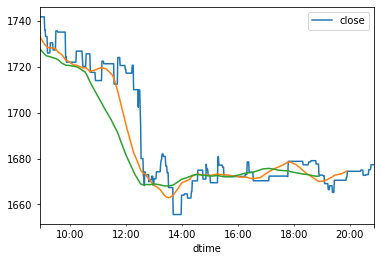

In [28]:
d[['close']].plot();
d['close'].rolling(window=60).mean().plot(label='60')
d['close'].rolling(window=120).mean().plot();

### Example methods

In [9]:
tars.start()

start


In [12]:
tars.trade('ETHUSD')

trade


In [13]:
tars.rebalance()

rebalance


In [16]:
my_model = None
tars.load_model(my_model)

load model


In [17]:
tars.get_performance_report()

get performance report


In [18]:
tars.get_portfolio()

get portfolio
